In [36]:
import numpy as np
import pandas as pd
# BeautifulSoup is used to remove html tags from the text
from bs4 import BeautifulSoup 
import re # For regular expressions

import matplotlib.pyplot as plt

# Stopwords can be useful to undersand the semantics of the sentence.
# Therefore stopwords are not removed while creating the word2vec model.
# But they will be removed  while averaging feature vectors.
from nltk.corpus import stopwords

In [6]:
df_train = pd.read_csv("./data/archive/labeledTrainData.tsv", header=0,\
                    delimiter="\t", quoting=3)
df_train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [8]:

df_test = pd.read_csv("./data/archive/testData.tsv",header=0,\
                    delimiter="\t", quoting=3)
df_test.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [40]:
df_train.sentiment.value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

[]

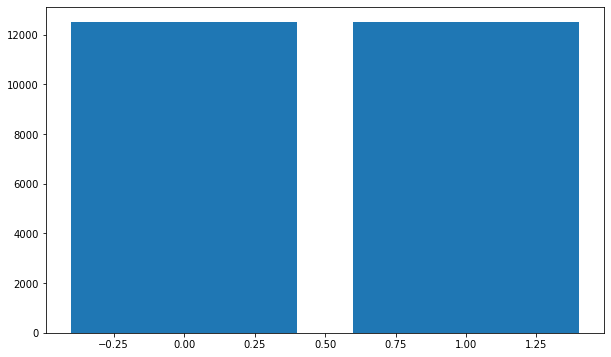

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(df_train.sentiment.value_counts().index, df_train.sentiment.value_counts())
plt.plot()

In [9]:
# This function converts a text to a sequence of words.
def review_wordlist(review, remove_stopwords=False):
    # 1. Removing html tags
    review_text = BeautifulSoup(review).get_text()
    # 2. Removing non-letter.
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    # 3. Converting to lower case and splitting
    words = review_text.lower().split()
    # 4. Optionally remove stopwords
    if remove_stopwords:
        stops = set(stopwords.words("english"))     
        words = [w for w in words if not w in stops]
    
    return(words)

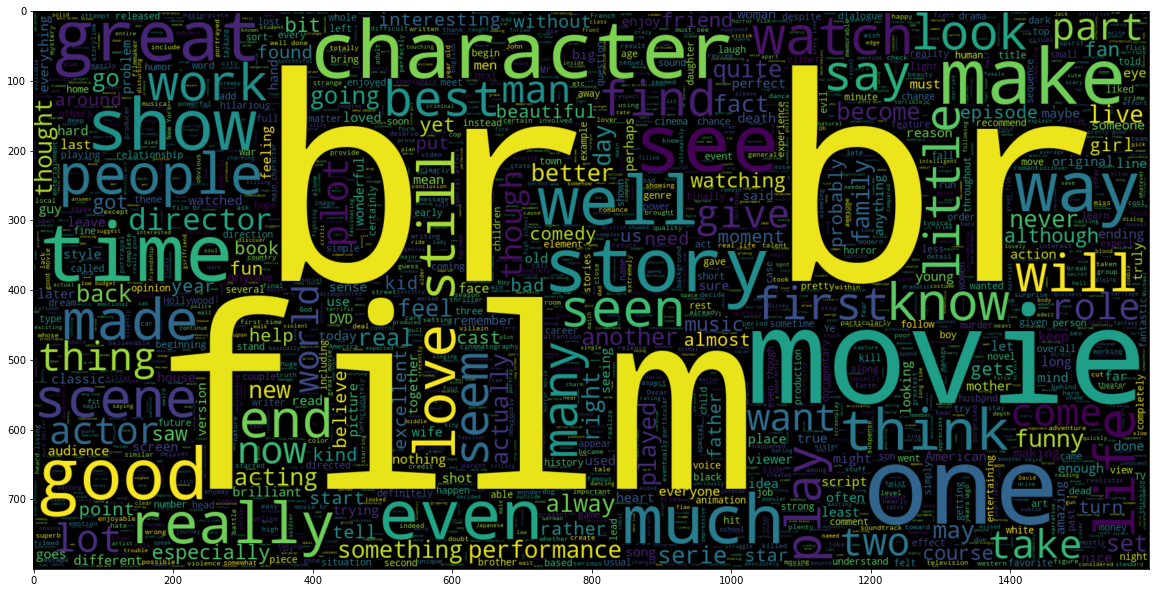

In [37]:
from wordcloud import WordCloud
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df_train[df_train.sentiment == 1].review))
plt.imshow(wc , interpolation = 'bilinear')

<h3>Stemming</h3>
<div class="alert alert-info">
    <p>
        Stemming usually refers to a process that chops off the ends of words in the hope of achieving goal correctly most of the time and often includes the removal of derivational affixes.
    </p>
</div>

<h3>Stopwords</h3>
<div class="alert alert-info">
    <p>Stopwords are commonly used words in English which have no contextual meaning in an sentence. So therefore we remove them before classification. Some stopwords are...</p>
</div>
             <img src="./data/Capture.png">
             
<h3> Tokenization </h3>
<div class="alert alert-info">
    <p> tokenization is the task of chopping it up into pieces, called tokens , perhaps at the same time throwing away certain characters, such as punctuation. </p>
</div>

<p>
    <code>tokenizer</code> create tokens for every word in the data corpus and map them to a index using dictionary.
    </p>


In [12]:
# word2vec expects a list of lists.
# Using punkt tokenizer for better splitting of a paragraph into sentences.

import nltk.data
#nltk.download('popular')

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [13]:
def review_sentences(review, tokenizer, remove_stopwords=False):
    # 1. Using nltk tokenizer
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    # 2. Loop for each sentence
    for raw_sentence in raw_sentences:
        if len(raw_sentence)>0:
            sentences.append(review_wordlist(raw_sentence,\
                                            remove_stopwords))

    # This returns the list of lists
    return sentences

In [15]:
sentences = []
print("Parsing sentences from training set")
for review in df_train["review"]:
    sentences += review_sentences(review, tokenizer)

Parsing sentences from training set


D:\Programs\Anaconda\lib\site-packages\bs4\__init__.py:329: MarkupResemblesLocatorWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
D:\Programs\Anaconda\lib\site-packages\bs4\__init__.py:329: MarkupResemblesLocatorWarning: "..." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
D:\Programs\Anaconda\lib\site-packages\bs4\__init__.py:414: MarkupResemblesLocatorWarning: "http://www.happierabroad.com"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [16]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [17]:
num_features = 300  # Word vector dimensionality
min_word_count = 40 # Minimum word count
num_workers = 4     # Number of parallel threads
context = 10        # Context window size
downsampling = 1e-3 # (0.001) Downsample setting for frequent words

# Initializing the train model
from gensim.models import word2vec
print("Training model....")
model = word2vec.Word2Vec(sentences,\
                          workers=num_workers,\
                          size=num_features,\
                          min_count=min_word_count,\
                          window=context,
                          sample=downsampling)

# To make the model memory efficient
model.init_sims(replace=True)

# Saving the model for later use. Can be loaded using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save(model_name)

2020-11-04 21:42:55,233 : INFO : collecting all words and their counts
2020-11-04 21:42:55,233 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-11-04 21:42:55,281 : INFO : PROGRESS: at sentence #10000, processed 225803 words, keeping 17776 word types
2020-11-04 21:42:55,328 : INFO : PROGRESS: at sentence #20000, processed 451892 words, keeping 24948 word types
2020-11-04 21:42:55,380 : INFO : PROGRESS: at sentence #30000, processed 671315 words, keeping 30034 word types
2020-11-04 21:42:55,430 : INFO : PROGRESS: at sentence #40000, processed 897815 words, keeping 34348 word types


Training model....


2020-11-04 21:42:55,484 : INFO : PROGRESS: at sentence #50000, processed 1116963 words, keeping 37761 word types
2020-11-04 21:42:55,531 : INFO : PROGRESS: at sentence #60000, processed 1338404 words, keeping 40723 word types
2020-11-04 21:42:55,585 : INFO : PROGRESS: at sentence #70000, processed 1561580 words, keeping 43333 word types
2020-11-04 21:42:55,631 : INFO : PROGRESS: at sentence #80000, processed 1780887 words, keeping 45714 word types
2020-11-04 21:42:55,681 : INFO : PROGRESS: at sentence #90000, processed 2004996 words, keeping 48135 word types
2020-11-04 21:42:55,729 : INFO : PROGRESS: at sentence #100000, processed 2226966 words, keeping 50207 word types
2020-11-04 21:42:55,779 : INFO : PROGRESS: at sentence #110000, processed 2446580 words, keeping 52081 word types
2020-11-04 21:42:55,824 : INFO : PROGRESS: at sentence #120000, processed 2668775 words, keeping 54119 word types
2020-11-04 21:42:55,875 : INFO : PROGRESS: at sentence #130000, processed 2894303 words, keep

2020-11-04 21:43:19,323 : INFO : training on a 29603620 raw words (20222320 effective words) took 21.2s, 954030 effective words/s
2020-11-04 21:43:19,324 : INFO : precomputing L2-norms of word weight vectors
2020-11-04 21:43:19,333 : INFO : saving Word2Vec object under 300features_40minwords_10context, separately None
2020-11-04 21:43:19,334 : INFO : not storing attribute vectors_norm
2020-11-04 21:43:19,335 : INFO : not storing attribute cum_table
2020-11-04 21:43:19,519 : INFO : saved 300features_40minwords_10context


In [18]:
# Few tests: This will print the odd word among them 
model.wv.doesnt_match("man woman dog child kitchen".split())

D:\Programs\Anaconda\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'kitchen'

In [19]:
model.wv.doesnt_match("france england germany berlin".split())

'berlin'

In [20]:
# This will print the most similar words present in the model
model.wv.most_similar("man")

[('woman', 0.6702255606651306),
 ('soldier', 0.6365029811859131),
 ('doctor', 0.6334130764007568),
 ('boy', 0.6273208260536194),
 ('cop', 0.5847952961921692),
 ('scientist', 0.5770788192749023),
 ('lady', 0.5701438188552856),
 ('person', 0.5673527121543884),
 ('priest', 0.5589277744293213),
 ('guy', 0.5578067898750305)]

In [21]:
model.wv.most_similar("awful")

[('terrible', 0.8290728330612183),
 ('horrible', 0.800502598285675),
 ('dreadful', 0.7519408464431763),
 ('atrocious', 0.6919822692871094),
 ('lame', 0.6687792539596558),
 ('stupid', 0.6679174900054932),
 ('laughable', 0.6653323769569397),
 ('bad', 0.6606606245040894),
 ('appalling', 0.655019223690033),
 ('ridiculous', 0.654295802116394)]

In [22]:
# This will give the total number of words in the vocabolary created from this dataset
model.wv.syn0.shape

<ipython-input-22-a3a5249d032e>:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  model.wv.syn0.shape


(8306, 300)

In [23]:
# Function to average all word vectors in a paragraph
def featureVecMethod(words, model, num_features):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    
    #Converting Index2Word which is a list to a set for better speed in the execution.
    index2word_set = set(model.wv.index2word)
    
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
    
    # Dividing the result by number of words to get average
    featureVec = np.divide(featureVec, nwords)
    return featureVec

In [24]:
# Function for calculating the average feature vector
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        # Printing a status message every 1000th review
        if counter%1000 == 0:
            print("Review %d of %d"%(counter,len(reviews)))
            
        reviewFeatureVecs[counter] = featureVecMethod(review, model, num_features)
        counter = counter+1
        
    return reviewFeatureVecs


In [25]:
# Calculating average feature vector for training set
clean_train_reviews = []
for review in df_train['review']:
    clean_train_reviews.append(review_wordlist(review, remove_stopwords=True))
    
trainDataVecs = getAvgFeatureVecs(clean_train_reviews, model, num_features)

Review 0 of 25000


<ipython-input-23-3a0cc7e3eff1>:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  featureVec = np.add(featureVec,model[word])


Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000


In [26]:
# Calculating average feature vactors for test set     
clean_test_reviews = []
for review in df_test["review"]:
    clean_test_reviews.append(review_wordlist(review,remove_stopwords=True))
    
testDataVecs = getAvgFeatureVecs(clean_test_reviews, model, num_features)

Review 0 of 25000


<ipython-input-23-3a0cc7e3eff1>:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  featureVec = np.add(featureVec,model[word])


Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000


In [27]:
# Fitting a random forest classifier to the training data
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)
    
print("Fitting random forest to training data....")    
forest = forest.fit(trainDataVecs, df_train["sentiment"])

Fitting random forest to training data....


In [33]:
result = forest.predict(testDataVecs)
output = pd.DataFrame(data={"id":df_test["id"], "sentiment":result, "review": df_test["review"]})
output.to_csv( "output.csv", index=False, quoting=3, quotechar='',escapechar='\\' )

In [34]:
output.head()

,id,sentiment,review
0,"""12311_10""",1,"""Naturally in a film who's main themes are of ..."
1,"""8348_2""",0,"""This movie is a disaster within a disaster fi..."
2,"""5828_4""",1,"""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""",1,"""Afraid of the Dark left me with the impressio..."
4,"""12128_7""",1,"""A very accurate depiction of small time mob l..."
